<a href="https://colab.research.google.com/github/shebegyare131/shebegyare131/blob/main/Flow%20Data%20Analysis%20_Using_FBprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet

In [214]:
#df=pd.read_csv('WW.csv')
#df.head()

import pandas as pd


def remove_timezone_label(data):

    pos = data.index('+00:00')

    # Slice data to get rid of the tz, then strip leading/trailing whitespace
    data = (data[:pos]).strip()

    return data


if __name__ == '__main__':
    df=pd.read_csv("WW.csv")

    # the apply() function is used to carry out a function on the data.
    df["created_at"] = df["created_at"].apply(remove_timezone_label)

    df.to_csv("WW_NEW.csv", index=False)

In [215]:
df.head()

,created_at,entry_id,Temperature,PH,Turbidity,flow,TDS,Pressure,Volume,Color
0,2022-03-27T15:07:07,1,29.19,7.11,0.0,2,0.0,96.75,84.34,64
1,2022-03-27T15:07:34,2,29.19,7.13,0.0,1,0.0,61.16,84.35,64
2,2022-03-27T15:07:53,3,29.19,7.13,0.0,1,0.0,63.35,1.16,64
3,2022-03-27T15:08:24,4,29.12,7.15,0.0,1,0.0,69.43,84.35,64
4,2022-03-27T15:08:40,5,29.19,7.14,0.0,2,0.0,69.43,84.36,64


In [216]:
df=df.drop(['Temperature'],axis=1)
df=df.drop(['PH'],axis=1)
df=df.drop(['Turbidity'],axis=1)
#df=df.drop(['flow'],axis=1)
df=df.drop(['TDS'],axis=1)
df=df.drop(['Pressure'],axis=1)
df=df.drop(['Volume'],axis=1)
df=df.drop(['Color'],axis=1)
df=df.drop(['entry_id'],axis=1)
df.head(200)

,created_at,flow
0,2022-03-27T15:07:07,2
1,2022-03-27T15:07:34,1
2,2022-03-27T15:07:53,1
3,2022-03-27T15:08:24,1
4,2022-03-27T15:08:40,2
...,...,...
195,2022-03-27T17:06:30,3
196,2022-03-27T17:15:42,3
197,2022-03-27T17:16:01,3
198,2022-03-27T17:16:18,3


In [ ]:
#Load Data
df=pd.read_csv("HQQ.csv")
#url = 'https://api.foodsecurityportal.org/en/datastore/dump/1daac0af-9c6c-5b9f-b879-5dbb42f2d4b5'
#df = pd.read_csv(url)
df.head(10)

In [ ]:
#df = df.drop(['PH'], axis=1)
df = df.drop(['Oxygen Consumption'], axis=1)
df = df.drop(['Ammonia Nitrogen'], axis=1)
#df = df.drop(['commodity'], axis=1)
df = df.drop(['Dissolved Oxygen'], axis=1)
#df = df.drop(['source_name'], axis=1)
#df = df.drop(['source_url'], axis=1)
#df = df.drop(['minPrice'], axis=1)
#df = df.drop(['maxPrice'], axis=1)
#df = df.drop(['percentageChange'], axis=1)
#df = df.drop(['last_sync'], axis=1)
#df = df.drop(['Oxygen Consumption'], axis=1) 
#df = df.drop(['timestamp'], axis=1)


df.head()

In [217]:
df.tail()

,created_at,flow
60164,2022-04-12T18:10:02,0
60165,2022-04-12T18:10:18,0
60166,2022-04-12T18:10:34,0
60167,2022-04-12T18:10:50,0
60168,2022-04-12T18:11:06,0


In [218]:
df.isnull().sum()

created_at    0
flow          0
dtype: int64

In [219]:
df.shape

(60169, 2)

In [220]:
#conversion_rate = 85.33
#df['price'] = conversion_rate * df['price']
#df.head()

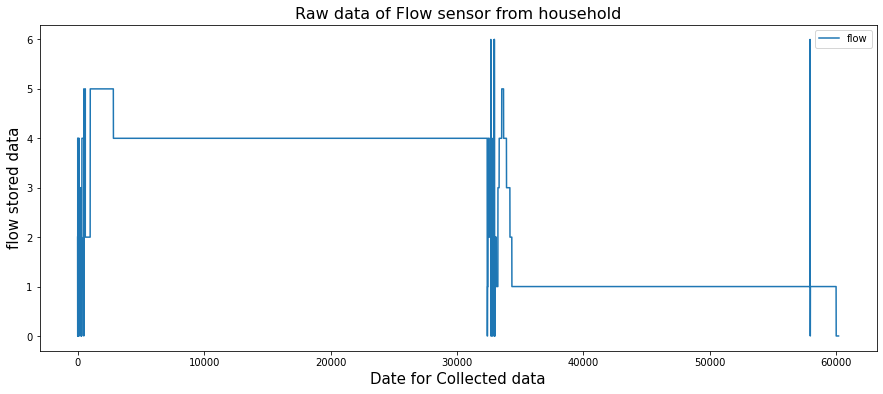

In [221]:
df.plot(figsize=(15, 6))
plt.title("Raw data of Flow sensor from household", fontsize=16)
plt.ylabel("flow stored data", fontsize=15)
plt.xlabel("Date for Collected data", fontsize=15)
plt.show()

In [222]:
df.columns = ['ds', 'y'] #required by fbprophet
df.head()

,ds,y
0,2022-03-27T15:07:07,2
1,2022-03-27T15:07:34,1
2,2022-03-27T15:07:53,1
3,2022-03-27T15:08:24,1
4,2022-03-27T15:08:40,2


In [223]:
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2022-03-27 15:07:07,2
1,2022-03-27 15:07:34,1
2,2022-03-27 15:07:53,1
3,2022-03-27 15:08:24,1
4,2022-03-27 15:08:40,2


In [196]:
df = df.sort_values(by='ds')
df

,ds,y
0,2022-03-27 15:07:07,96.75
1,2022-03-27 15:07:34,61.16
2,2022-03-27 15:07:53,63.35
3,2022-03-27 15:08:24,69.43
4,2022-03-27 15:08:40,69.43
...,...,...
60164,2022-04-12 18:10:02,51.92
60165,2022-04-12 18:10:18,51.92
60166,2022-04-12 18:10:34,51.92
60167,2022-04-12 18:10:50,51.92


In [224]:
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [225]:
model = Prophet()

In [226]:
df.columns

Index(['ds', 'y'], dtype='object')

In [227]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [228]:
model.component_modes

{'additive': ['weekly',
  'daily',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [229]:
df.tail()

,ds,y
60164,2022-04-12 18:10:02,0
60165,2022-04-12 18:10:18,0
60166,2022-04-12 18:10:34,0
60167,2022-04-12 18:10:50,0
60168,2022-04-12 18:11:06,0


In [230]:
future_dates = model.make_future_dataframe(periods=180)

In [231]:
future_dates.tail()

,ds
60344,2022-10-05 18:11:06
60345,2022-10-06 18:11:06
60346,2022-10-07 18:11:06
60347,2022-10-08 18:11:06
60348,2022-10-09 18:11:06


In [232]:
pred = model.predict(future_dates)
pred.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-03-27 15:07:07,2.250343,1.531305,2.522993,2.250343,2.250343,-0.223729,-0.223729,-0.223729,0.016958,0.016958,0.016958,-0.240688,-0.240688,-0.240688,0.0,0.0,0.0,2.026614
1,2022-03-27 15:07:34,2.251963,1.549241,2.511647,2.251963,2.251963,-0.223412,-0.223412,-0.223412,0.017236,0.017236,0.017236,-0.240648,-0.240648,-0.240648,0.0,0.0,0.0,2.028551
2,2022-03-27 15:07:53,2.253103,1.522434,2.501030,2.253103,2.253103,-0.223190,-0.223190,-0.223190,0.017430,0.017430,0.017430,-0.240620,-0.240620,-0.240620,0.0,0.0,0.0,2.029913
3,2022-03-27 15:08:24,2.254964,1.560193,2.529501,2.254964,2.254964,-0.222830,-0.222830,-0.222830,0.017744,0.017744,0.017744,-0.240574,-0.240574,-0.240574,0.0,0.0,0.0,2.032134
4,2022-03-27 15:08:40,2.255924,1.518155,2.478586,2.255924,2.255924,-0.222645,-0.222645,-0.222645,0.017906,0.017906,0.017906,-0.240551,-0.240551,-0.240551,0.0,0.0,0.0,2.033279


In [233]:
#pred = pred[['ds', 'yhat']]
#pred

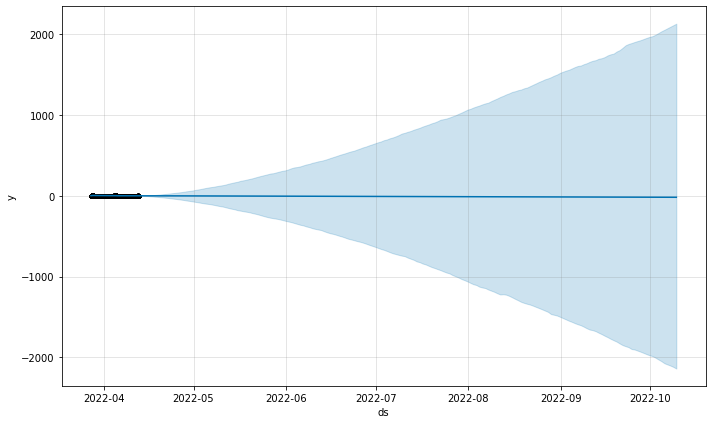

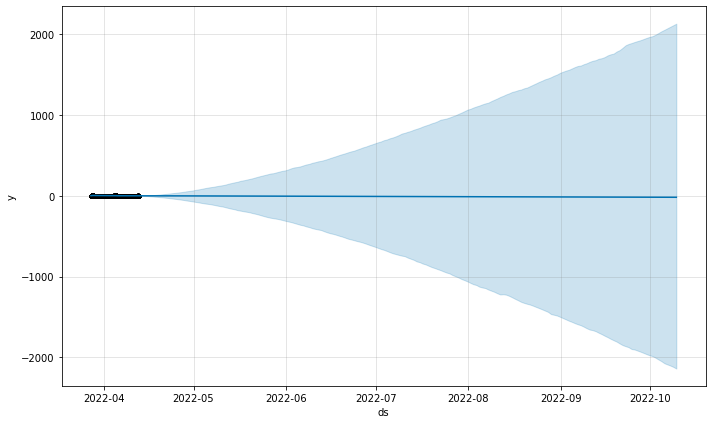

In [234]:
model.plot(pred)

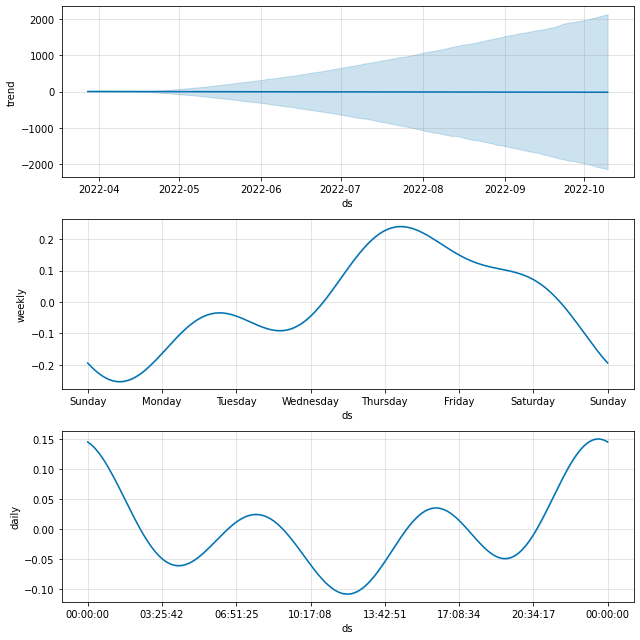

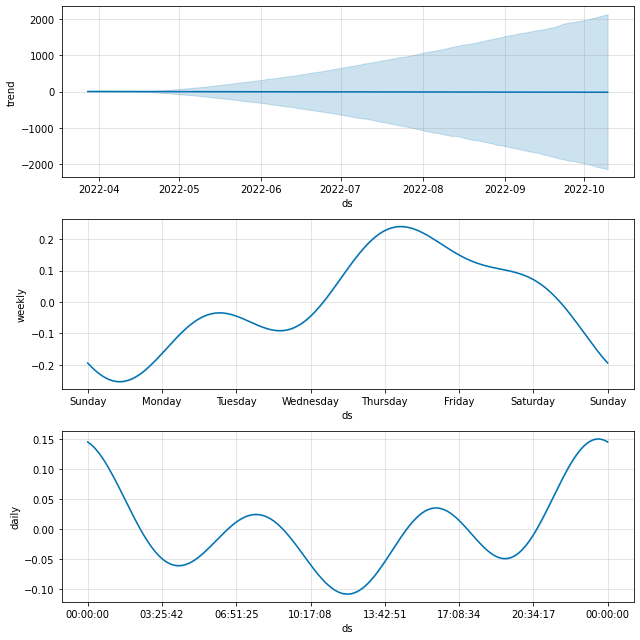

In [235]:
model.plot_components(pred)

In [239]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(model, initial='9 days', period='6 days', horizon='3 days')
#df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
df_cv.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2022-04-09 18:11:06 and 2022-04-09 18:11:06


  0%|          | 0/1 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-04-09 21:35:48,1.489267,0.872043,2.033829,1,2022-04-09 18:11:06
1,2022-04-09 21:36:04,1.489898,0.901126,2.108126,1,2022-04-09 18:11:06
2,2022-04-09 21:36:20,1.490529,0.894139,2.083773,1,2022-04-09 18:11:06
3,2022-04-09 21:36:38,1.491240,0.872665,2.064101,1,2022-04-09 18:11:06
4,2022-04-09 21:36:54,1.491872,0.885886,2.131973,1,2022-04-09 18:11:06


In [238]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,0 days 09:52:40,0.538478,0.733811,0.729012,0.750586,0.568498
1,0 days 09:52:56,0.538898,0.734097,0.729313,0.750590,0.568498
2,0 days 09:53:12,0.539318,0.734383,0.729615,0.750615,0.568498
3,0 days 09:53:28,0.539738,0.734669,0.729917,0.750635,0.567766
4,0 days 09:53:43,0.540159,0.734955,0.730218,0.750645,0.567033


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


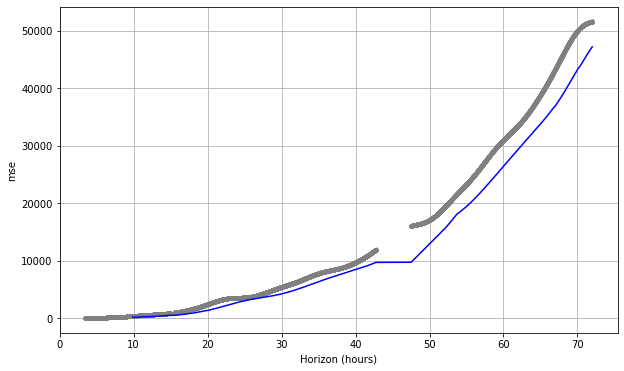

In [209]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mse')

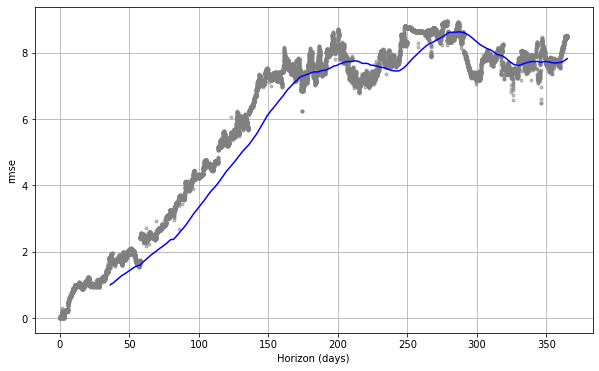

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

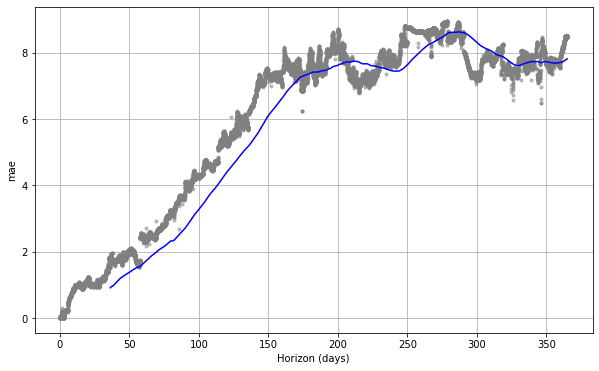

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mae')

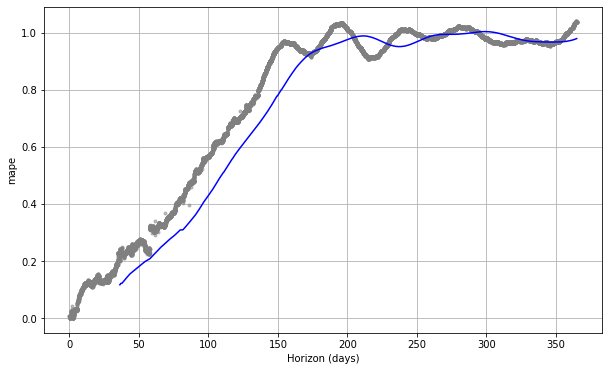

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

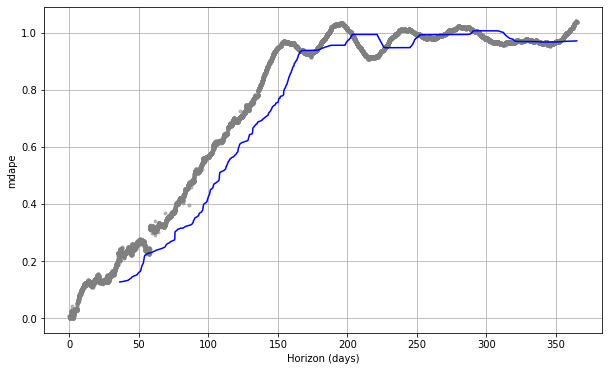

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mdape')